---
bibliography: ../references/references.bib
csl: ../references/abnt.csl
---

# SINDy

Sparse Identification of Nonlinear Dynamic Systems (SINDy) [@brunton2016]

In [ ]:
sys.path.insert(0, '../')
import numpy as np
from twoPhaseFlow import twoPhaseFlow as tpf
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.io import loadmat

In [ ]:
N = 100
x = np.linspace(0,1,N)
Nt = 100
t = np.linspace(0,1,Nt)
M = 1

u = tpf.u_solve(tpf.u_convex, x, t, M)

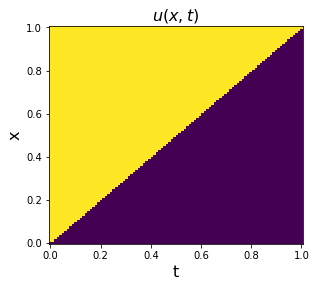

In [ ]:
# Plot u and u_dot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.pcolormesh(t, x, u)
plt.xlabel('t', fontsize=16)
plt.ylabel('x', fontsize=16)
plt.title(r'$u(x, t)$', fontsize=16)

u = u.reshape(len(x), len(t), 1)


In [ ]:
library_functions = [lambda x: x, lambda x: x*x]
library_functions_names = [lambda x: x, lambda x: x + x]
pde_lib = ps.PDELibrary(
    library_functions = library_functions,
    function_names = library_functions_names,
    derivative_order = 1,
    spatial_grid = x, 
    is_uniform=True
)
pde_opt = ps.STLSQ(threshold=30, normalize_columns=True)

model = ps.SINDy(
    optimizer=pde_opt,
    feature_library=pde_lib,
    feature_names=['u']
)
dt = t[1]-t[0]
u_dot = ps.FiniteDifference(axis=1)._differentiate(u, t=dt)

print('SSR model: ')
optimizer = ps.SSR(normalize_columns=True, kappa=5e-3)
model = ps.SINDy(feature_library=pde_lib, feature_names=['u'], optimizer=optimizer)
model.fit(u, t=dt)
model.print()



SSR model: 
(u)' = 0.125 u + -0.350 uu + -0.259 u_1 + -0.010 uu_1 + -0.640 uuu_1
